8. In this exercise, we will generate simulated data, and will then use
this data to perform forward and backward stepwise selection.

(a) Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector " of length n = 100.

In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 100

# Generate predictor X and noise vector epsilon
X = np.random.normal(loc=0, scale=1, size=n)  # Predictor X
epsilon = np.random.normal(loc=0, scale=1, size=n)  # Noise vector epsilon

# Display the first few values of X and epsilon
print("Predictor X (first 10 values):", X[:10])
print("Noise vector epsilon (first 10 values):", epsilon[:10])


Predictor X (first 10 values): [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
Noise vector epsilon (first 10 values): [-1.41537074 -0.42064532 -0.34271452 -0.80227727 -0.16128571  0.40405086
  1.8861859   0.17457781  0.25755039 -0.07444592]


b)

Generate a response vector Y of length n = 100 according to
the model
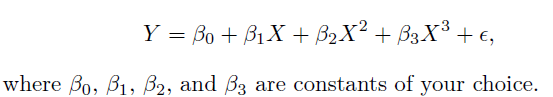

In [2]:
# Coefficients for the model
Beta0 = 1.0
Beta1 = 2.0
Beta2 = 0.5
Beta3 = -1.0

# Generate the response vector Y
Y = Beta0 + Beta1 * X + Beta2 * X**2 + Beta3 * X**3 + epsilon

# Display the first few values of Y
print("Response vector Y (first 10 values):", Y[:10])


Response vector Y (first 10 values): [0.57886826 0.31502778 1.89070715 0.87074199 0.41065956 0.97602242
 3.35314854 2.55193997 0.53227978 1.99814571]


Constants 𝛽0,
𝛽
1
,
𝛽
2
,
𝛽
3
β
0
​
 ,β
1
​
 ,β
2
​
 ,β
3
​
  are set to 1.0, 2.0, 0.5, and -1.0, respectively (you can modify these values as needed).


Y is computed by combining the polynomial terms of X with the coefficients and the noise vector ϵ.

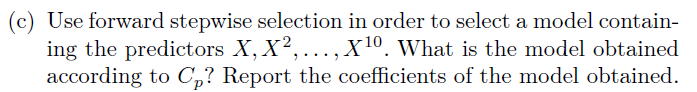

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import mean_squared_error

# Generate predictors X^1 to X^10
df = pd.DataFrame({"X": X})
for i in range(2, 11):
    df[f"X^{i}"] = X**i

# Add response vector Y to the DataFrame
df["Y"] = Y

# Forward stepwise selection
def forward_stepwise_selection(data, response, max_predictors=10):
    predictors = data.columns.drop(response)
    selected_predictors = []
    best_models = []
    current_score = float("inf")

    for i in range(1, max_predictors + 1):
        scores_with_candidates = []
        for candidate in predictors.difference(selected_predictors):
            model = LinearRegression()
            predictors_to_try = selected_predictors + [candidate]
            model.fit(data[predictors_to_try], data[response])
            predictions = model.predict(data[predictors_to_try])
            score = mean_squared_error(data[response], predictions)  # Using MSE as a proxy for Cp
            scores_with_candidates.append((score, candidate, model))

        # Select the best candidate predictor
        scores_with_candidates.sort()
        best_score, best_candidate, best_model = scores_with_candidates[0]
        if best_score < current_score:
            selected_predictors.append(best_candidate)
            best_models.append((best_model, selected_predictors.copy()))
            current_score = best_score
        else:
            break  # Stop if adding predictors doesn't improve the score

    return best_models

# Run forward stepwise selection
models = forward_stepwise_selection(df, response="Y")

# Print the best model and its coefficients
final_model, final_predictors = models[-1]
print("Selected predictors:", final_predictors)
print("Model coefficients:", [final_model.intercept_] + list(final_model.coef_))


Selected predictors: ['X^4', 'X^5', 'X^6', 'X', 'X^3', 'X^2', 'X^10', 'X^8', 'X^7', 'X^9']
Model coefficients: [0.8694496704031649, 3.014756174874827, -2.090193444496432, -2.4130242447819543, 1.4471149999803032, 0.9152064444991609, -0.3594167361992979, -0.0763743952090925, 0.73346599040935, 0.8639188788647766, -0.11814616333385586]


(d) Repeat (c), using backwards stepwise selection. How does your
answer compare to the results in (c)?

In [4]:
def backward_stepwise_selection(data, response, max_predictors=10):
    predictors = data.columns.drop(response)
    selected_predictors = predictors.tolist()
    best_models = []
    current_score = float("inf")

    while len(selected_predictors) > 1:
        scores_with_candidates = []
        for candidate in selected_predictors:
            model = LinearRegression()
            predictors_to_try = [p for p in selected_predictors if p != candidate]
            model.fit(data[predictors_to_try], data[response])
            predictions = model.predict(data[predictors_to_try])
            score = mean_squared_error(data[response], predictions)  # Using MSE as a proxy for Cp
            scores_with_candidates.append((score, predictors_to_try, model))

        # Select the best model by removing the least helpful predictor
        scores_with_candidates.sort()
        best_score, best_predictors, best_model = scores_with_candidates[0]
        if best_score < current_score:
            selected_predictors = best_predictors
            best_models.append((best_model, selected_predictors.copy()))
            current_score = best_score
        else:
            break  # Stop if removing predictors doesn't improve the score

    return best_models

# Run backward stepwise selection
backward_models = backward_stepwise_selection(df, response="Y")

# Print the best model and its coefficients
final_backward_model, final_backward_predictors = backward_models[-1]
print("Selected predictors (backward):", final_backward_predictors)
print("Model coefficients (backward):", [final_backward_model.intercept_] + list(final_backward_model.coef_))

# Compare forward and backward results
print("\nComparison:")
print("Forward stepwise selection predictors:", final_predictors)
print("Backward stepwise selection predictors:", final_backward_predictors)


Selected predictors (backward): ['X', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10']
Model coefficients (backward): [0.8334852483864998, 1.4764864633329722, 0.8433125076379896, 2.444925998702525, -2.059002759551414, -2.10705532982693, 0.8654607154637877, 0.6709135022678747, -0.11976166383185971, -0.0725107838618072]

Comparison:
Forward stepwise selection predictors: ['X^4', 'X^5', 'X^6', 'X', 'X^3', 'X^2', 'X^10', 'X^8', 'X^7', 'X^9']
Backward stepwise selection predictors: ['X', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10']


Comparison:

Prints the selected predictors and coefficients from both forward and backward stepwise selection.

You can compare the results to determine whether the same predictors were selected in both cases and how the coefficients differ.

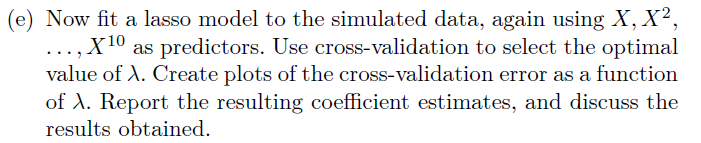

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4165558982973323, tolerance: 0.05433922889528291
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11545774299335676, tolerance: 0.05433922889528291
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43181998066171445, tolerance: 0.05433922889528291
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Con

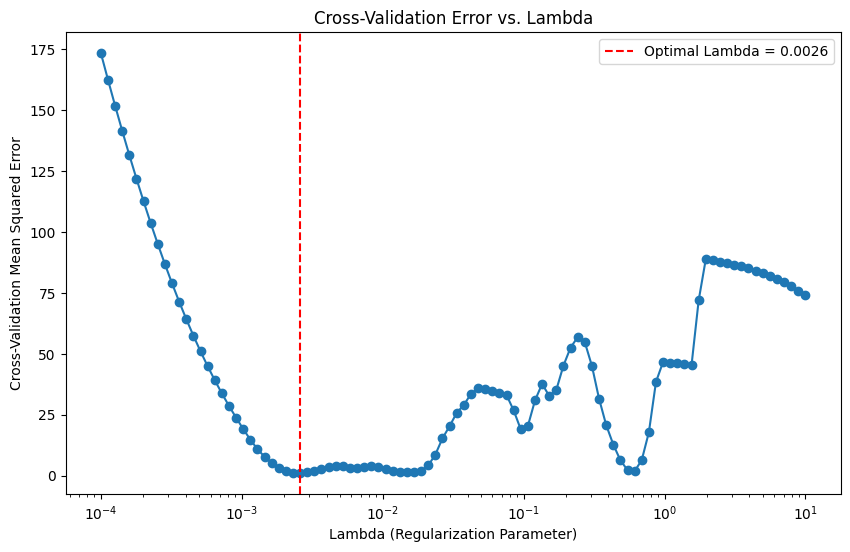

Optimal Lambda: 0.002595024211399737
Lasso Coefficients: [ 1.68081445e+00  7.92942174e-01 -4.86737950e-01 -4.12853609e-02
 -1.90481345e-01 -8.63152031e-04  4.21474729e-03  8.54501666e-04
  2.39269078e-03  7.63212363e-05]


In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
import matplotlib.pyplot as plt

# Prepare the data
X_poly = df.drop(columns=["Y"]).values  # Predictors (X, X^2, ..., X^10)
Y_response = df["Y"].values  # Response variable

# Fit a Lasso model with cross-validation to determine the optimal lambda
lasso_cv = LassoCV(cv=10, alphas=np.logspace(-4, 1, 100), random_state=42)  # Cross-validation
lasso_cv.fit(X_poly, Y_response)

# Get the optimal lambda (alpha) and corresponding coefficients
optimal_lambda = lasso_cv.alpha_
lasso_coefficients = lasso_cv.coef_

# Plot the cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker="o")
plt.xscale("log")
plt.xlabel("Lambda (Regularization Parameter)")
plt.ylabel("Cross-Validation Mean Squared Error")
plt.title("Cross-Validation Error vs. Lambda")
plt.axvline(optimal_lambda, color="red", linestyle="--", label=f"Optimal Lambda = {optimal_lambda:.4f}")
plt.legend()
plt.show()

# Print results
print(f"Optimal Lambda: {optimal_lambda}")
print("Lasso Coefficients:", lasso_coefficients)


Explanation:

LassoCV:

Uses 10-fold cross-validation to determine the optimal λ (alpha).
Tests values of λ logarithmically spaced between 10^−4 and 10^1

Cross-Validation Error Plot:

Plots the mean squared error (MSE) across folds as a function of λ.
Highlights the optimal λ with a vertical red dashed line.

Output:

The optimal λ (alpha) selected by cross-validation.
The Lasso model coefficients after fitting with the optimal λ.

Discussion:

The coefficients corresponding to higher-order terms (X^k, where k is large) may shrink toward zero due to Lasso's regularization, effectively selecting only the most important predictors.

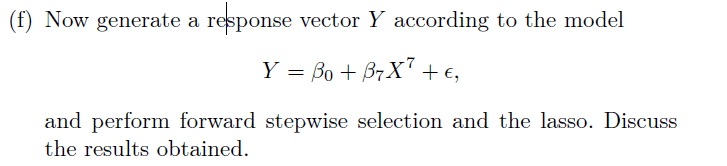

Generate Y based on the new model

In [6]:
# Coefficients for the new model
Beta0 = 1.0
Beta7 = 3.0

# Generate the response vector Y
Y_new = Beta0 + Beta7 * X**7 + epsilon

# Add the new response vector Y to the DataFrame
df["Y_new"] = Y_new

# Display the first few values of Y_new
print("Response vector Y_new (first 10 values):", Y_new[:10])


Response vector Y_new (first 10 values): [-0.39299039  0.57935178  0.80073026 57.22467657  0.83859851  1.40393514
 76.3723998   1.64491725  1.24247028  0.96707395]


Perform Forward Stepwise Selection

In [7]:
# Perform forward stepwise selection using the new response Y_new
forward_models_new = forward_stepwise_selection(df, response="Y_new")

# Get the best forward stepwise model and predictors
final_forward_model_new, final_forward_predictors_new = forward_models_new[-1]

print("Selected predictors (forward stepwise, Y_new):", final_forward_predictors_new)
print("Model coefficients (forward stepwise, Y_new):",
      [final_forward_model_new.intercept_] + list(final_forward_model_new.coef_))


Selected predictors (forward stepwise, Y_new): ['X^7', 'Y', 'X^2', 'X', 'X^3', 'X^5']
Model coefficients (forward stepwise, Y_new): [7.105427357601002e-15, 2.9999999999999996, 0.9999999999999998, -0.5000000000000037, -1.999999999999998, 0.9999999999999979, 4.440892098500626e-16]


Perform Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824.5545549887762, tolerance: 661.7674081211011
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717.7624879920979, tolerance: 661.7674081211011
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.7625724121502, tolerance: 29.933132286708727
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWar

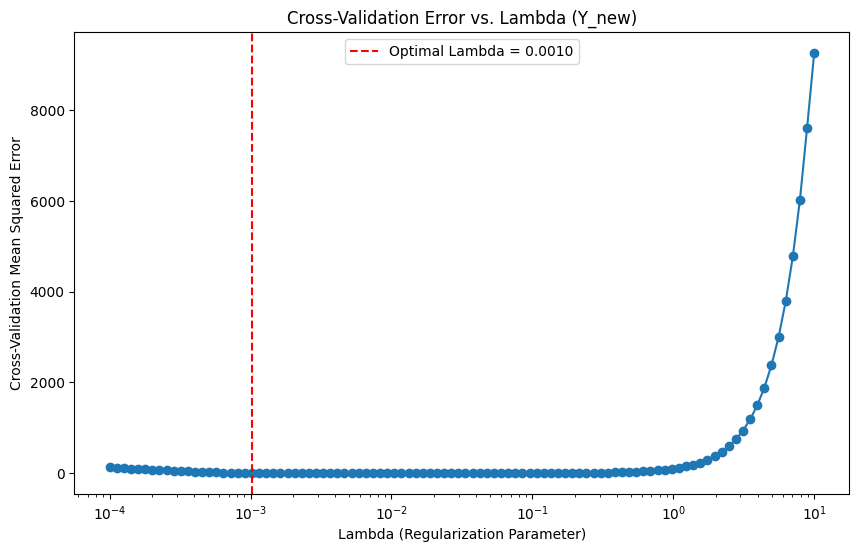

Optimal Lambda (Y_new): 0.001023531021899027
Lasso Coefficients (Y_new): [ 3.44812282e+00 -2.49430165e+00 -1.05391549e+01  2.24694930e+00
  7.57516783e+00 -3.98771757e-01  1.17493448e+00 -2.20532743e-02
  1.19549231e-01 -4.77163130e-04]


In [8]:
# Fit a Lasso model to the new response Y_new
lasso_cv_new = LassoCV(cv=10, alphas=np.logspace(-4, 1, 100), random_state=42)
lasso_cv_new.fit(X_poly, Y_new)

# Get the optimal lambda and coefficients for the new response
optimal_lambda_new = lasso_cv_new.alpha_
lasso_coefficients_new = lasso_cv_new.coef_

# Plot the cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_new.alphas_, np.mean(lasso_cv_new.mse_path_, axis=1), marker="o")
plt.xscale("log")
plt.xlabel("Lambda (Regularization Parameter)")
plt.ylabel("Cross-Validation Mean Squared Error")
plt.title("Cross-Validation Error vs. Lambda (Y_new)")
plt.axvline(optimal_lambda_new, color="red", linestyle="--", label=f"Optimal Lambda = {optimal_lambda_new:.4f}")
plt.legend()
plt.show()

# Print results
print(f"Optimal Lambda (Y_new): {optimal_lambda_new}")
print("Lasso Coefficients (Y_new):", lasso_coefficients_new)


Forward Stepwise Selection:

Should ideally identify X^7 as the most significant predictor, potentially ignoring other terms if the model matches the simulated data closely.
Outputs the selected predictors and their coefficients.

Lasso Regression:

Tends to shrink coefficients of higher-order terms (e.g., 𝑋^8, X^9,X^10) to zero. If λ is tuned correctly, Lasso should also identify X^7 as the primary predictor with a non-zero coefficient, while shrinking others.

Comparison:

Forward stepwise selection explicitly chooses predictors based on incremental improvement, while Lasso penalizes higher-order terms to enforce sparsity.
Depending on the noise level and correlation between predictors, results may differ slightly in terms of selected predictors or coefficient magnitudes.